In [26]:
import matplotlib.pyplot as plt
import cv2
#Technically not necessaryt in newest versions of jupyter
%matplotlib inline


In [27]:
cat4=cv2.imread('C:/Users/ADMIN/6-Computer Vision/CATS_DOGS/train/CAT/4.jpg')
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [28]:
cat4.shape

(375, 500, 3)

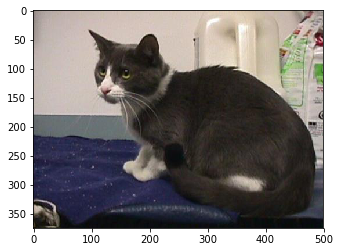

In [29]:
plt.imshow(cat4)

In [30]:
dog2=cv2.imread('C:/Users/ADMIN/6-Computer Vision/CATS_DOGS/train/DOG/2.jpg')
dog2=cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

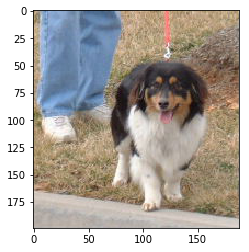

In [31]:
plt.imshow(dog2)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
image_gen=ImageDataGenerator(rotation_range=30, #rotate the image 30degrees
                            width_shift_range=0.1,#shift the pic width by max of 0.1
                            height_shift_range=0.1,#shift the pic height by max of 0.1
                            rescale=1/255,#rescale the image by normalizing it
                            shear_range=0.2,#shear means cutting away part of the image
                            zoom_range=0.2,#zoom in by 20%
                            horizontal_flip=True,#Allow horizontal flipping
                            fill_mode='nearest' #fill in missing pixels with nearest
                            )

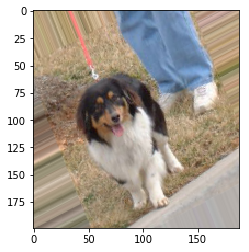

In [34]:
plt.imshow(image_gen.random_transform(dog2))

In [35]:
image_gen.flow_from_directory('C:/Users/ADMIN/6-Computer Vision/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory('C:/Users/ADMIN/6-Computer Vision/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [37]:
#width ,height,channels
image_shape=(150,150,3)

In [38]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [39]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [40]:
model.add(Dense(128))
model.add(Activation('relu'))

#Dropouts help reduce overfitting by randomly turning the neurons off dusring tran
#here we say randomly turn off 50% of neurons .
model.add(Dropout(0.5))

#last layer ,remember its binary ,0=cat,1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [42]:
batch_size=16

train_image_gen=image_gen.flow_from_directory("C:/Users/ADMIN/6-Computer Vision/CATS_DOGS/train",
                                         target_size=image_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary'
                                         )

Found 18743 images belonging to 2 classes.


In [43]:

test_image_gen=image_gen.flow_from_directory("C:/Users/ADMIN/6-Computer Vision/CATS_DOGS/test",
                                         target_size=image_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary'
                                         )

Found 6251 images belonging to 2 classes.


In [44]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
results=model.fit_generator(train_image_gen,epochs=10,
                           steps_per_epoch=15,
                           validation_data=test_image_gen,
                           validation_steps=12
                           )

Epoch 1/10
15/15 [==============================] - 76s 5s/step - loss: 0.7346 - acc: 0.4875 - val_loss: 0.7032 - val_acc: 0.4999
Epoch 2/10
15/15 [==============================] - 54s 4s/step - loss: 0.7059 - acc: 0.4458 - val_loss: 0.6933 - val_acc: 0.4999
Epoch 3/10
15/15 [==============================] - 53s 4s/step - loss: 0.6938 - acc: 0.4417 - val_loss: 0.6930 - val_acc: 0.5276
Epoch 4/10
15/15 [==============================] - 53s 4s/step - loss: 0.6930 - acc: 0.5125 - val_loss: 0.6926 - val_acc: 0.5034
Epoch 5/10
15/15 [==============================] - 53s 4s/step - loss: 0.6936 - acc: 0.4625 - val_loss: 0.6919 - val_acc: 0.5895
Epoch 6/10
15/15 [==============================] - 53s 4s/step - loss: 0.6928 - acc: 0.5417 - val_loss: 0.6918 - val_acc: 0.5943
Epoch 7/10
15/15 [==============================] - 54s 4s/step - loss: 0.6907 - acc: 0.5500 - val_loss: 0.6893 - val_acc: 0.5500
Epoch 8/10
15/15 [==============================] - 53s 4s/step - loss: 0.6843 - acc: 0.53

In [47]:
results.history['acc']

[0.4875,
 0.44583333333333336,
 0.44166666666666665,
 0.5125,
 0.4625,
 0.5416666666666666,
 0.55,
 0.5375,
 0.5458333333333333,
 0.5]

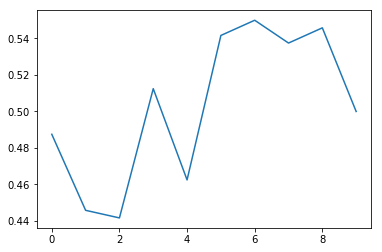

In [48]:
plt.plot(results.history['acc'])